In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
print(torch.__version__)

2.5.0+cu121


In [ ]:
!nvidia-smi

Thu Nov  7 21:28:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P8              14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

----------------------------------------
# Simple Linear Regression Deep Learning Model using Neural Networks

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10], X.shape, end="\n\n")
print(y[:10], y.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) torch.Size([50, 1])

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) torch.Size([50, 1])


In [ ]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

    # Plot testing data in greed
    plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

    if predictions is not None:
      # Plot the predictions in red (predictions were made on the test data)
      plt.scatter(test_data, predictions, c="r", s=10, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

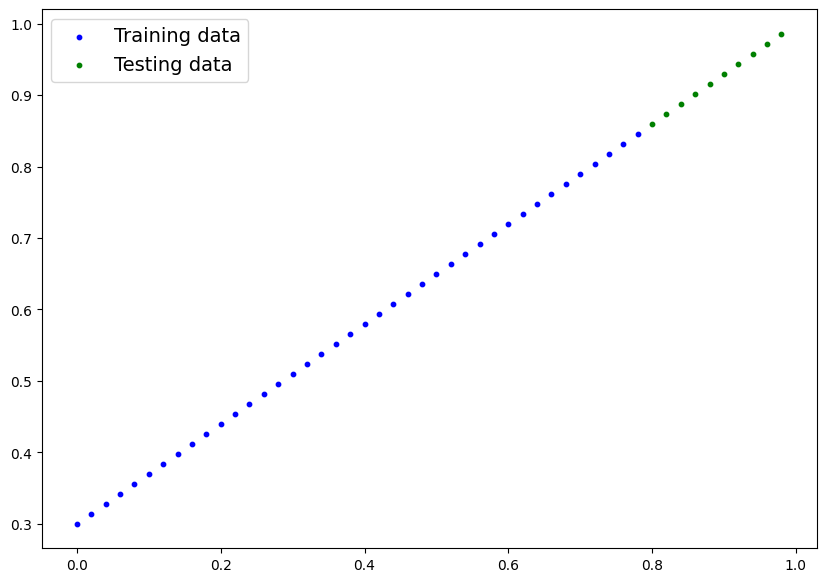

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# Set a random seed
torch.manual_seed(42)

# Check the model parameters
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

# Another way (not preferred)
# with torch.no_grad():
#   y_preds = model_0(X_test)

print(y_preds, end="\n\n")
print(y_test)

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


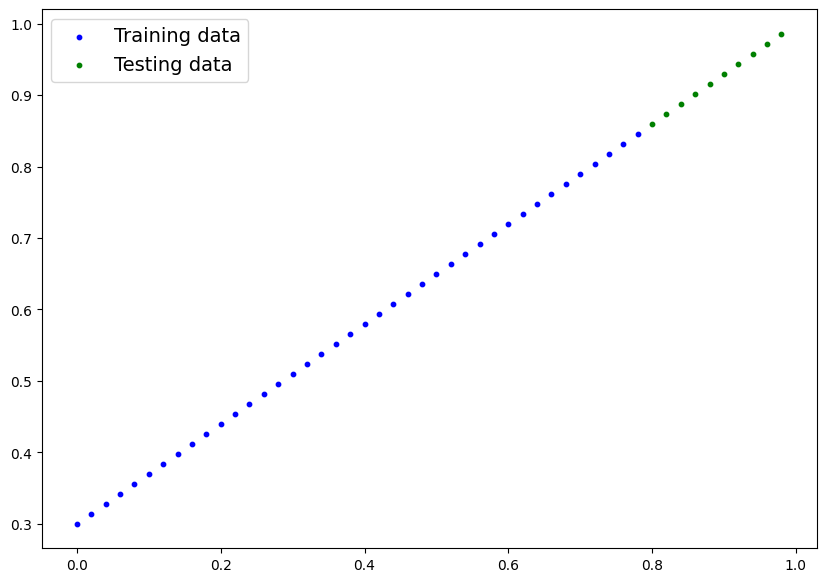

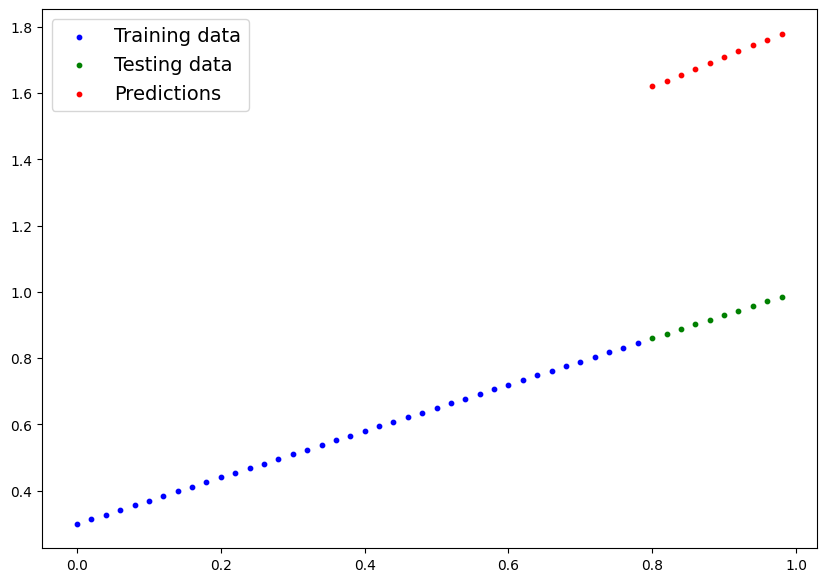

In [ ]:
# Plot the predictions
plot_predictions()
plot_predictions(predictions=y_preds)

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  #-- Training:
  # Set the model to training mode
  model_0.train()  # enabling require_grad

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()  # Perform Backporpagation

  # 5. Optimizer step
  optimizer.step()  # Gradient Descent


  #-- Testing:
  # Put the model in evaluation mode
  model_0.eval()  # disabling require_grad and turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(f"Model Parameters: {model_0.state_dict()}\n")

Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7637526988983154
Model Parameters: OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])

Epoch: 10 | Loss: 0.5708791017532349 | Test Loss: 0.6290428042411804
Model Parameters: OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])

Epoch: 20 | Loss: 0.45566922426223755 | Test Loss: 0.4943329691886902
Model Parameters: OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])

Epoch: 30 | Loss: 0.34045934677124023 | Test Loss: 0.35962313413619995
Model Parameters: OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])

Epoch: 40 | Loss: 0.2252494841814041 | Test Loss: 0.2249133139848709
Model Parameters: OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])

Epoch: 50 | Loss: 0.1100396141409874 | Test Loss: 0.09020347893238068
Model Parameters: OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])

Epoch: 60 | Loss: 0.00972498580

In [ ]:
print("Epoch Count:\n", epoch_count)
print("\nLoss Values:\n", loss_values)
print("\nTest Loss Values:\n", test_loss_values)

Epoch Count:
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

Loss Values:
 [tensor(0.6861, grad_fn=<MeanBackward0>), tensor(0.5709, grad_fn=<MeanBackward0>), tensor(0.4557, grad_fn=<MeanBackward0>), tensor(0.3405, grad_fn=<MeanBackward0>), tensor(0.2252, grad_fn=<MeanBackward0>), tensor(0.1100, grad_fn=<MeanBackward0>), tensor(0.0097, grad_fn=<MeanBackward0>), tensor(0.0062, grad_fn=<MeanBackward0>), tensor(0.0028, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>), tensor(0.0071, grad_fn=<MeanBackward0>)]

Test Loss Values:
 [tensor(0.7638), tensor(0.6290), tensor(

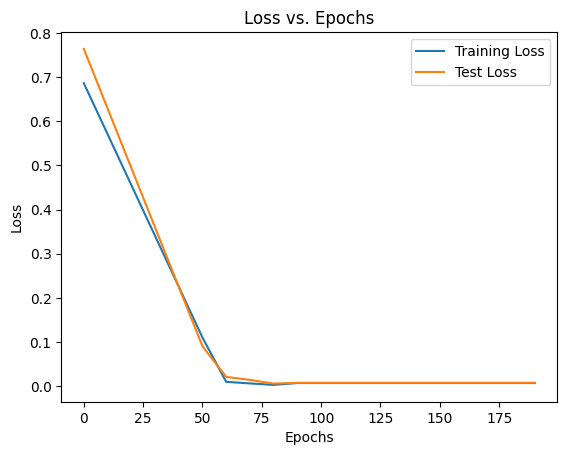

In [ ]:
plt.plot(epoch_count, torch.tensor(loss_values).cpu().numpy(), label="Training Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label="Test Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

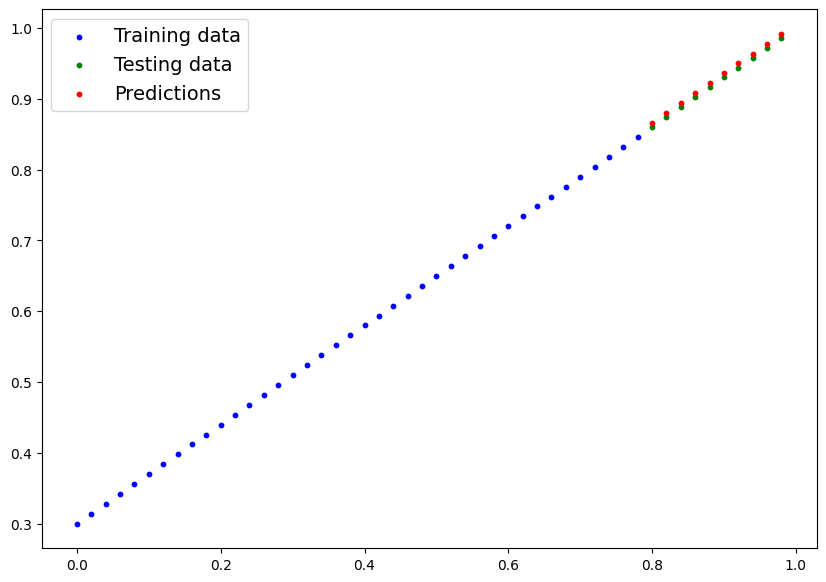

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

-------------------------------------------------
# Saving and loading our model

In [ ]:
print(model_0.state_dict())

for param in model_0.state_dict():
  print(f"\nParameter Name: {param}")
  print(f"Value:", model_0.state_dict()[param])
  print("Shape:", model_0.state_dict()[param].shape)
  print("Data type:", model_0.state_dict()[param].dtype)
  print("Dimensions:", model_0.state_dict()[param].ndim)

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

Parameter Name: weights
Value: tensor([0.6977])
Shape: torch.Size([1])
Data type: torch.float32
Dimensions: 1

Parameter Name: bias
Value: tensor([0.3080])
Shape: torch.Size([1])
Data type: torch.float32
Dimensions: 1


In [ ]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [ ]:
# Save the model
from pathlib import Path

def save_model(model: torch.nn.Module, target_dir: str,  model_name: str):
  """
  Saves a PyTorch model to a target directory.
  """
  # Create target directory
  MODEL_PATH = Path(target_dir)
  MODEL_PATH.mkdir(parents=True, exist_ok=True)

  MODEL_NAME = model_name
  MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

  # Save the model state dict
  print(f"Saving model to: {MODEL_SAVE_PATH}")
  torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

  return MODEL_SAVE_PATH

In [ ]:
MODEL_PATH = save_model(model=model_0, target_dir="models", model_name="model_0.pth")
MODEL_PATH

Saving model to: models/model_0.pth


PosixPath('models/model_0.pth')

In [ ]:
# Load the model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_PATH, weights_only=True))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make some prediction with the loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Saving the entire model
torch.save(obj=model_0, f="models/model_0_entire.pth")

In [ ]:
model = torch.load("models/model_0_entire.pth", weights_only=False)
model.eval()

LinearRegressionModel()

In [ ]:
with torch.inference_mode():
  y_loaded_preds = model(X_test)

y_loaded_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
y_loaded_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

---------------------------------------------
# Putting it all together (Revision)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt

In [ ]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


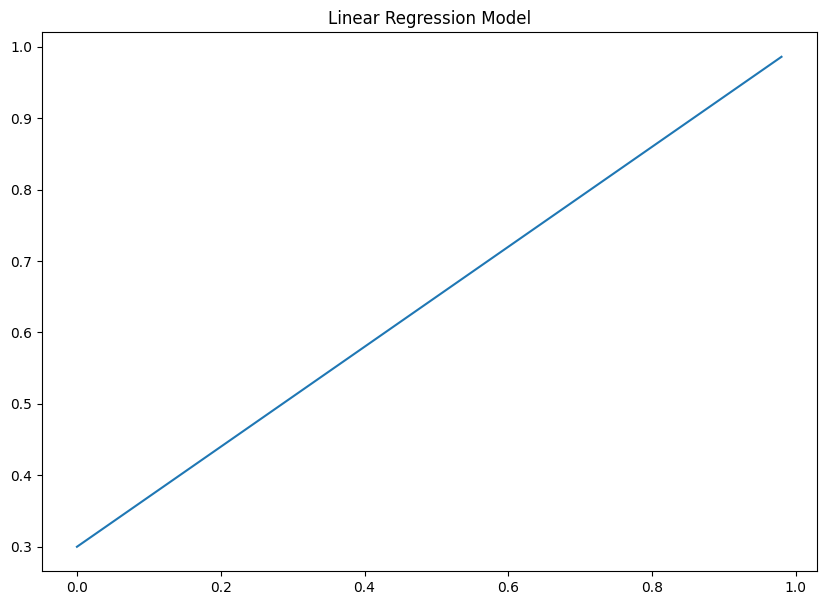

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias


plt.figure(figsize=(10,7))
plt.title("Linear Regression Model")
plt.plot(X, y)
plt.show()

In [ ]:
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
class MyLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
my_model = MyLinearRegressionModel()
my_model.to(device)
my_model, my_model.state_dict()

(MyLinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2018], device='cuda:0'))]))

In [ ]:
next(my_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

y_preds = my_model(X_test)

print(y_preds)
print(y_test)

tensor([[ 0.0265],
        [ 0.0221],
        [ 0.0177],
        [ 0.0134],
        [ 0.0090],
        [ 0.0046],
        [ 0.0002],
        [-0.0042],
        [-0.0085],
        [-0.0129]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]], device='cuda:0')


In [ ]:
print(my_model.state_dict())

OrderedDict([('linear_layer.weight', tensor([[-0.2191]], device='cuda:0')), ('linear_layer.bias', tensor([0.2018], device='cuda:0'))])


In [ ]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=my_model.parameters(), lr=0.001)

In [ ]:
epochs = 400
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #--- Training

  # Set the model to training mode
  my_model.train()

  # Forward pass
  y_preds = my_model(X_train)

  # Calculate the loss
  loss = loss_fn(y_preds, y_train)
  
  # Zero the gradients to avoid accumulation
  optimizer.zero_grad()
  
  # Backward pass to calculate the gradients
  loss.backward()

  # Update the weights and biases
  optimizer.step()


  #--- Testing
  # Set the model to evaluation mode
  my_model.eval()

  with torch.inference_mode():
    # Forward pass
    y_test_preds = my_model(X_test)

    # Calculate the loss
    test_loss = loss_fn(y_test_preds, y_test)


  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().cpu().numpy())
    test_loss_values.append(test_loss.detach().cpu().numpy())

    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.4566597044467926 | Test Loss: 0.9148644804954529
Epoch: 10 | Loss: 0.44513869285583496 | Test Loss: 0.9013934135437012
Epoch: 20 | Loss: 0.4336176812648773 | Test Loss: 0.887922465801239
Epoch: 30 | Loss: 0.42209672927856445 | Test Loss: 0.8744515776634216
Epoch: 40 | Loss: 0.4105757176876068 | Test Loss: 0.8609806299209595
Epoch: 50 | Loss: 0.39905476570129395 | Test Loss: 0.8475095629692078
Epoch: 60 | Loss: 0.38753390312194824 | Test Loss: 0.8340389132499695
Epoch: 70 | Loss: 0.3760130703449249 | Test Loss: 0.8205680847167969
Epoch: 80 | Loss: 0.3644922375679016 | Test Loss: 0.8070972561836243
Epoch: 90 | Loss: 0.3529713749885559 | Test Loss: 0.7936264872550964
Epoch: 100 | Loss: 0.34158754348754883 | Test Loss: 0.7802556157112122
Epoch: 110 | Loss: 0.33104148507118225 | Test Loss: 0.7672845125198364
Epoch: 120 | Loss: 0.32079631090164185 | Test Loss: 0.7545170783996582
Epoch: 130 | Loss: 0.3111831247806549 | Test Loss: 0.7420550584793091
Epoch: 140 | Loss: 0.3019

In [ ]:
# Display the model parameters
my_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0721]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4908], device='cuda:0'))])

In [ ]:
# Actual 'weight' and 'bias' values
weight, bias

(0.7, 0.3)

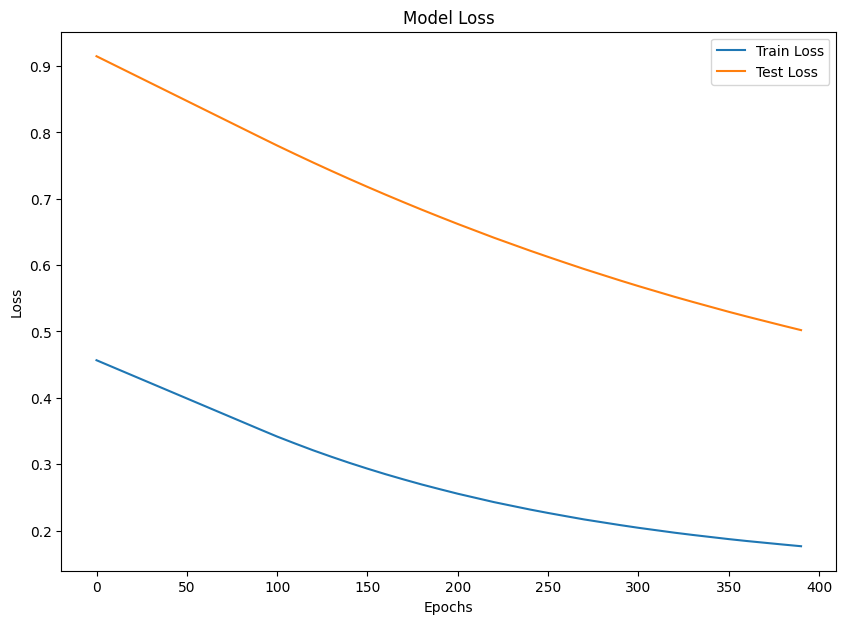

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

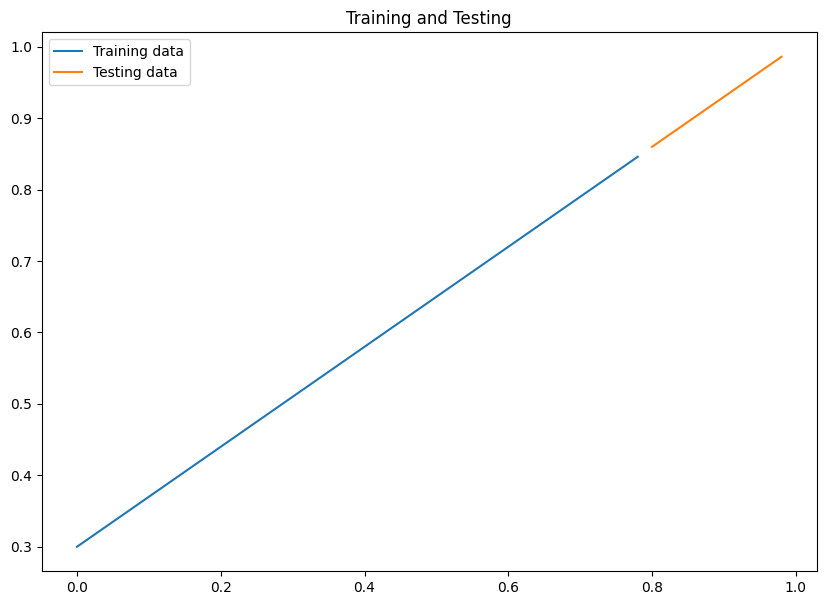

In [ ]:
def plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.plot(train_data.cpu(), train_labels.cpu(), label="Training data")
  plt.plot(test_data.cpu(), test_labels.cpu(), label="Testing data")

  if predictions is not None:
    plt.plot(test_data.cpu(), predictions, label="Predictions")

  plt.title("Training and Testing")
  plt.legend()
  plt.show()


plot_prediction()

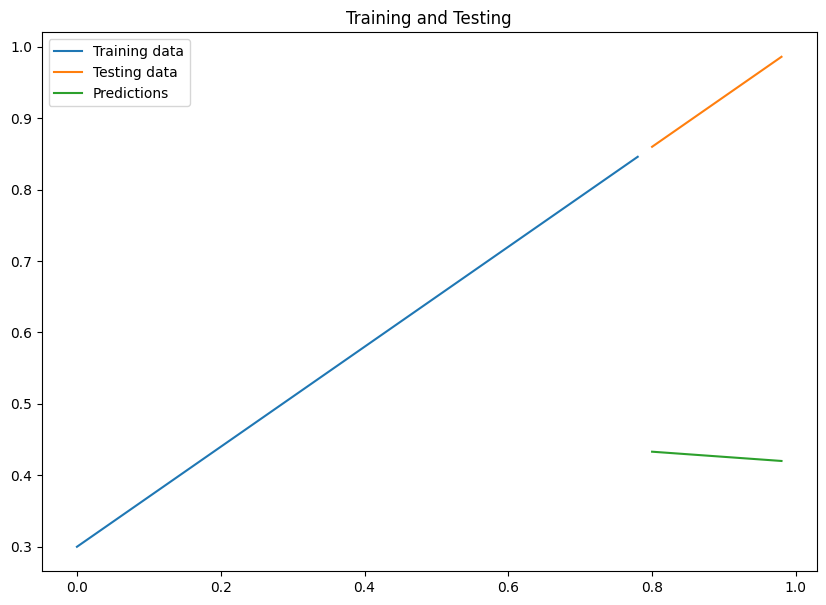

In [ ]:
with torch.inference_mode():
  y_preds = my_model(X_test)

plot_prediction(predictions=y_preds.cpu())

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
next(my_model.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Save the model state dict
torch.save(obj=my_model.state_dict(), f="models/my_model.pth")

In [ ]:
loaded_model = MyLinearRegressionModel()
loaded_model.load_state_dict(torch.load("models/my_model.pth", weights_only=True))
loaded_model.to(device)

loaded_model.eval()
y_loaded_preds = my_model(X_test)

print(y_preds == y_loaded_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
